In [ ]:
#Objectives 
# 1. Load and preprocess the dataset
# 2. Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers
# 3. Analyze the data to Identify which variables most influence fertilizer recommendations, determine the crop type type with the highest average soil moisture, and suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.
# 4. Visualize the data to understand trends and distributions
# 5. Evaluate the model performance using appropriate metrics
# 6. Save the cleaned and processed data for future use

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
#Load the dataset and perform initial inspection
df = pd.read_csv('climate_action_data.csv')
#Initial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [2]:
#Structure of dataset
df.shape

(913, 10)

In [3]:
#Further inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [4]:
#Descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [ ]:
#Handling Bad data
#Checking for empty cells / values
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
#Load the dataset and perform initial inspection
df = pd.read_csv('climate_action_data.csv')
print("Missing values in each column:")
df.isnull().sum()
#There is no missing value 

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [7]:
#Working on missing values
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')
x = df['Fertilizer_Recommended(kg/ha)'].median()
df.fillna({'Fertilizer_Recommended(kg/ha)': x}, inplace = True)
y = df['Sensor_ID'].mode([0])
df.fillna({'Sensor_ID': y}, inplace = True)
print(df.to_string())

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm) Drone_Image_ID
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4  Tomatoes                           67.6                       26.6       IMG-2000
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3     Wheat                          130.4                        8.3       IMG-2001
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6  Tomatoes                           36.0                       29.4       IMG-2002
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7     Maize                           85.8                       19.6       IMG-2003
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6     Wheat                           75.6                       29.9       IMG-2004
5    SEN-1005  2025-01-06         

In [5]:
#Duplicate data
#Checking for duplicate data 
duplicates = df.duplicated()
if duplicates.any():
    print('Duplicates found:')
    print(df[duplicates])
    print('Number of duplicate rows:', df.duplicated().sum())
else:
    print('No Duplicates found')

Duplicates found:
    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
800  SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
802  SEN-1175  2025-06-25            22.21    5.42           23.4        68.4   
803  SEN-1735  2027-01-06             71.4    4.93           24.5        67.0   
804  SEN-1242  2025-08-31            74.04    5.62           25.5        76.9   
805  SEN-1764  2027-02-04            12.35    7.38           27.8        33.4   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2   

    Crop_

In [9]:
#Working on duplicate values
df = df.drop_duplicates()
print(df.to_string())
print("Number of rows after removing duplicates:", df.shape[0])

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm) Drone_Image_ID
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4  Tomatoes                           67.6                       26.6       IMG-2000
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3     Wheat                          130.4                        8.3       IMG-2001
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6  Tomatoes                           36.0                       29.4       IMG-2002
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7     Maize                           85.8                       19.6       IMG-2003
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6     Wheat                           75.6                       29.9       IMG-2004
5    SEN-1005  2025-01-06         

In [11]:
#Wrong format
# Check for non numeric values in numeric columns
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values found in column: {col}")

Non-numeric values found in column: Soil_Moisture(%)
Non-numeric values found in column: Soil_pH
Non-numeric values found in column: Temperature(C)
Non-numeric values found in column: Humidity(%)
Non-numeric values found in column: Irrigation_Recommended(mm)


In [14]:
#Checking for wrong formats in non numeric values
for col in ['Sensor_ID', 'Date', 'Crop_Type', 'Drone_Image_ID']:
    if col in df.columns:
        # Check for non-string values
        non_string_values = df[~df[col].apply(lambda x: isinstance(x, str))]
        if not non_string_values.empty:
            print(f"Non-string values found in column: {col}")
            print(non_string_values)



Non-string values found in column: Date
    Sensor_ID Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
449  SEN-1449  NaN            15.85    6.66           19.4        51.5   
456  SEN-1456  NaN            10.79     5.2           25.9        43.3   
484  SEN-1484  NaN             50.9    5.64           27.2        34.1   
801  SEN-1510  NaN            52.94    4.78           20.4        43.8   

    Crop_Type  Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
449  Tomatoes                           72.2                       23.8   
456  Tomatoes                          120.3                       14.9   
484   Lettuce                          105.0                       10.2   
801     Beans                           84.1                       28.1   

    Drone_Image_ID  
449       IMG-2449  
456       IMG-2456  
484       IMG-2484  
801       IMG-2510  
Non-string values found in column: Crop_Type
    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(

In [17]:
#Converting to correct format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Handle Soil_Moisture(%) column with 'error' values
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Soil_Moisture(%)' with the median
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())
# Clean the confidence Soil-pH
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Soil-pH' with the median
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())
# Handle 'Temperature(C)' with 'error' values
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Temperature(C)' with the median
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())
# Clean the 'Humidity(%)' column
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Humidity(%)' with the median
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())
# Clean the 'Irrigation_Recommended(mm)' column
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Humidity(%)' with the median
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())
print(df.to_string())

    Sensor_ID       Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm) Drone_Image_ID
0    SEN-1000 2025-01-01             36.22     6.98            21.3         50.4  Tomatoes                           67.6                        26.6       IMG-2000
1    SEN-1001 2025-01-02             76.55     5.03            23.5         34.3     Wheat                          130.4                         8.3       IMG-2001
2    SEN-1002 2025-01-03             61.24     6.52            21.9         54.6  Tomatoes                           36.0                        29.4       IMG-2002
3    SEN-1003 2025-01-04             51.91     6.62            24.0         48.7     Maize                           85.8                        19.6       IMG-2003
4    SEN-1004 2025-01-05             20.92     5.98            19.2         70.6     Wheat                           75.6                        29.9       IMG-2004
5    SEN-1

In [18]:
# EDA Exploratory Data Analysis
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Summary statistics
print("Summary statistics:")
df.describe()

Shape of the dataset: (802, 10)
Summary statistics:


,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2026-02-04 07:45:33.834586624,44.767756,6.248865,26.461471,60.034539,87.460723,17.392269
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,2026-02-03 12:00:00,45.410000,6.260000,26.600000,59.600000,85.950000,17.400000
75%,2026-08-23 18:00:00,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460731,1.021573,4.863302,17.416023,34.765497,7.140127


Text(0.5, 1.0, 'Soil_pH')

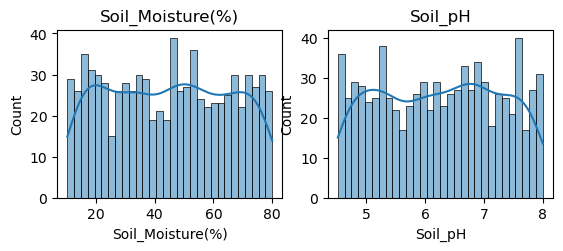

In [21]:
#Historams
#Soil_Moisture(%)
plt.subplot(2, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Soil_Moisture(%)')
# Histogram of 'Soil_pH'
plt.subplot(2, 2, 2)
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title('Soil_pH')


Text(0.5, 1.0, 'Humidity(%)')

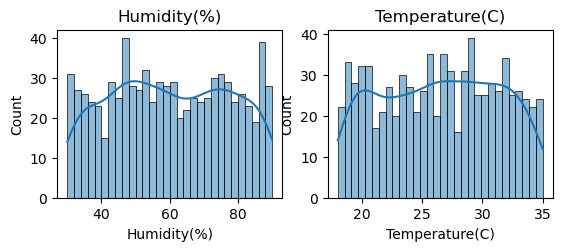

In [25]:
# Histogram of 'Temperature(C)'
plt.subplot(2, 2, 2)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title('Temperature(C)')

# Histogram of 'Humidity(%)'
plt.subplot(2, 2, 1)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Humidity(%)')



Text(0.5, 1.0, 'Irrigation_Recommended(mm)')

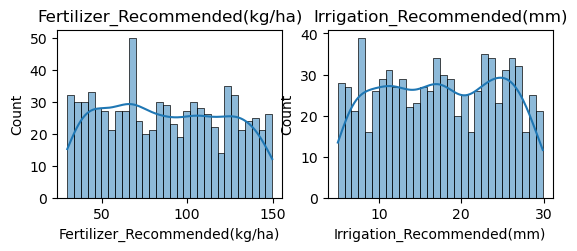

In [26]:
# Histogram of 'Fertilizer_Recommended(kg/ha)'
plt.subplot(2, 2, 1)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title('Fertilizer_Recommended(kg/ha)')
# Histogram of 'Irrigation_Recommended(mm)'
plt.subplot(2, 2, 2)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title('Irrigation_Recommended(mm)')

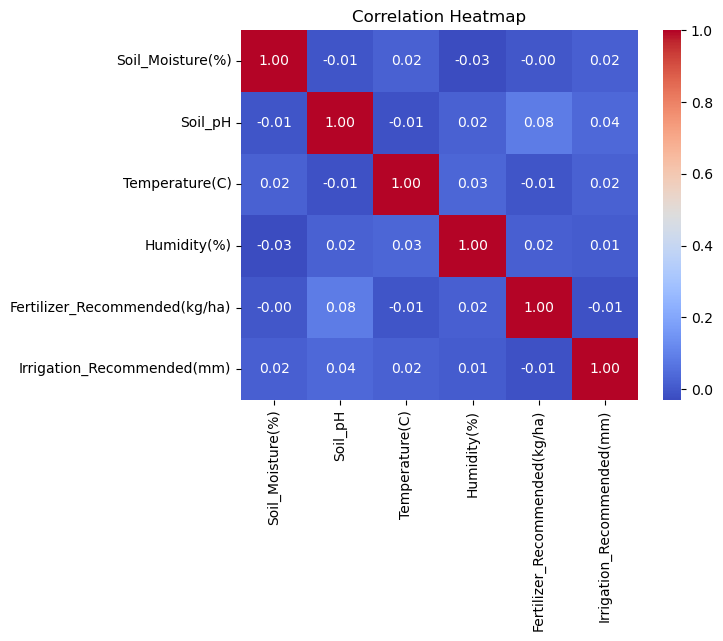

In [28]:
#Correlation heatmap
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Fertilizer_Recommendations are mainly influenced by soil ph
#Crop with hignest soil moisture is maize

In [30]:
#Exporting cleaned data frame
import pandas as pd
df= pd.read_csv('climate_action_data.csv')
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
# Step 4: Verify the export
exported_data = pd.read_csv('cleaned_precision_agriculture_data.csv')
print(exported_data.head())  # Display the first few rows of the exported data

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003